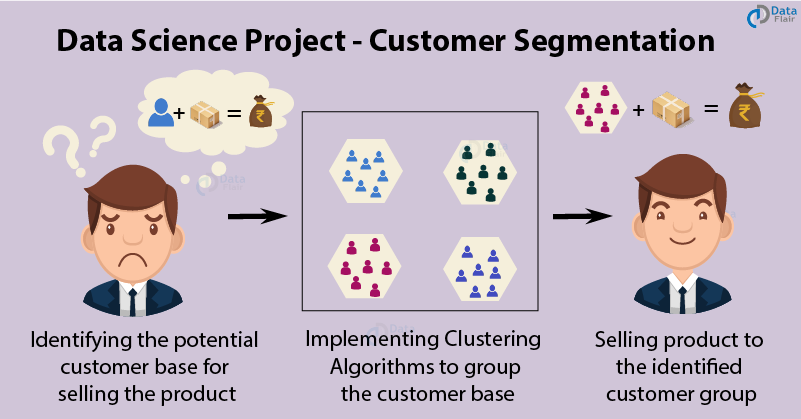


**Customer Segmentation (Clustering) adalah proses membagi pelanggan menjadi kelompok kelompok berdasarkan perilaku mereka dengan menggunakan machine learning**


## DATASET

In [1]:
import pandas as pd
import zipfile
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns

Dataset diambil dari e-commerce dari perusahaan UK yang berisi transaksi dari 1 Desember 2010 - 9 Desember 2011

In [2]:
# URL ke file ZIP di GitHub (raw)
url = "https://raw.githubusercontent.com/UswatunChasanah44/Project1/main/Retail.zip"

# Ambil konten ZIP
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # Lihat daftar file di dalam ZIP
    print("Isi ZIP:", z.namelist())  # cek nama file Excel-nya

    # Baca Excel dari dalam ZIP
    with z.open('Online Retail.xlsx') as file:
        df = pd.read_excel(file, engine='openpyxl')

Isi ZIP: ['Online Retail.xlsx']


In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Cleaning Data

In [4]:
# Check for missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
# Handling missing values by dropping rows with NaNs
df_dropped = df.dropna()

# Display the number of rows before and after dropping NaNs
print(f"\nOriginal number of rows: {len(df)}")
print(f"Number of rows after dropping NaNs: {len(df_dropped)}")


Original number of rows: 541909
Number of rows after dropping NaNs: 406829


In [6]:
# Check for duplicate rows
print("\nNumber of duplicate rows:", df_dropped.duplicated().sum())

# Display duplicate rows
print("\nDuplicate rows:")
display(df_dropped[df_dropped.duplicated(keep=False)].sort_values(by=df_dropped.columns.tolist()))


Number of duplicate rows: 5225

Duplicate rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,2011-11-04 13:25:00,2.95,15110.0,United Kingdom
461407,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
529980,C580764,22667,RECIPE BOX RETROSPOT,-12,2011-12-06 10:38:00,2.95,14562.0,United Kingdom


In [7]:
df_dropped['TotalPrice'] = df_dropped['Quantity'] * df_dropped['UnitPrice']
df_dropped.head()

<ipython-input-7-2f8a4cc93f32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['TotalPrice'] = df_dropped['Quantity'] * df_dropped['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Teknik yang digunakan customer segmentation kali ini adalah menggunakan RFM

## RFM Feature Engineering

RFM Analysis adalah teknik klasik dalam analisis perilaku pelanggan, khususnya dalam Customer Segmentation.

**Recency (R)** : Berapa lama sejak terakhir kali pelanggan membeli (mengukur keterkinian/loyalitas)

**Frequency (F)** : Berapa kali pelanggan melakukan transaksi dalam periode tertentu

**Monotary (M)** : Total uang yang dibelanjakan oleh pelanggan  


In [8]:
from datetime import datetime

latest_date = df_dropped['InvoiceDate'].max()

# Define the date to calculate recency from (e.g., the day after the last transaction)
present_date = latest_date + pd.Timedelta(days=1)

# Calculate Recency for each customer
recency_df = df_dropped.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (present_date - recency_df['InvoiceDate']).dt.days
recency_df = recency_df[['CustomerID', 'Recency']]
print("Recency DataFrame:")
display(recency_df.head())

# Calculate Frequency
frequency_df = df_dropped.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
print("\nFrequency DataFrame:")
display(frequency_df.head())

# Calculate Monetary
monetary_df = df_dropped.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_df.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)
print("\nMonetary DataFrame:")
display(monetary_df.head())


Recency DataFrame:


,CustomerID,Recency
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310



Frequency DataFrame:


,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1



Monetary DataFrame:


,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [9]:
# Merge RFM components
rfm_df = recency_df.merge(frequency_df, on='CustomerID')
rfm_df = rfm_df.merge(monetary_df, on='CustomerID')

print("\nRFM DataFrame:")
rfm_df


RFM DataFrame:


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4367,18280.0,278,1,180.60
4368,18281.0,181,1,80.82
4369,18282.0,8,3,176.60
4370,18283.0,4,16,2094.88


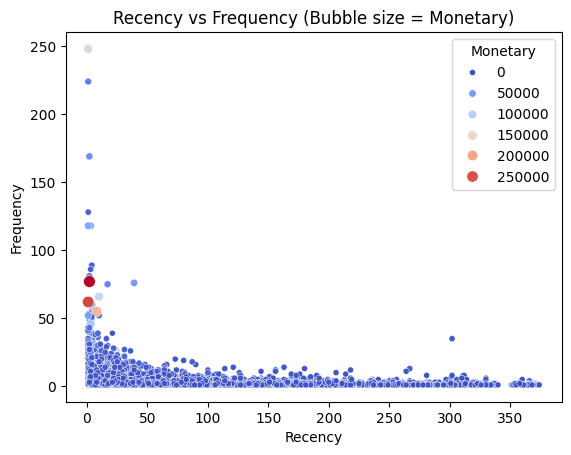

In [10]:
# Recency vs Frequency
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', size='Monetary', hue='Monetary', palette='coolwarm')
plt.title("Recency vs Frequency (Bubble size = Monetary)")
plt.show()


Berdasarkan hasil scatter plot di atas, dapat disimpulkan bahwa:

Mayoritas pelanggan memiliki Recency tinggi dan Frequency rendah
→ **Artinya banyak pelanggan tidak aktif atau jarang melakukan pembelian baru-baru ini.**

Titik-titik terkonsentrasi di bagian kanan bawah grafik.

Pelanggan dengan Recency rendah (belanja baru-baru ini) cenderung memiliki Frequency tinggi
→ Terlihat pada titik-titik di sebelah kiri bawah hingga ke tengah vertikal.

Ini adalah pelanggan aktif dan setia.

Ukuran gelembung (Monetary) lebih besar di area Recency rendah & Frequency tinggi
→ Pelanggan yang sering membeli dan baru-baru ini bertransaksi juga menghabiskan lebih banyak uang.

Contoh: titik berwarna merah/oranye di pojok kiri bawah.

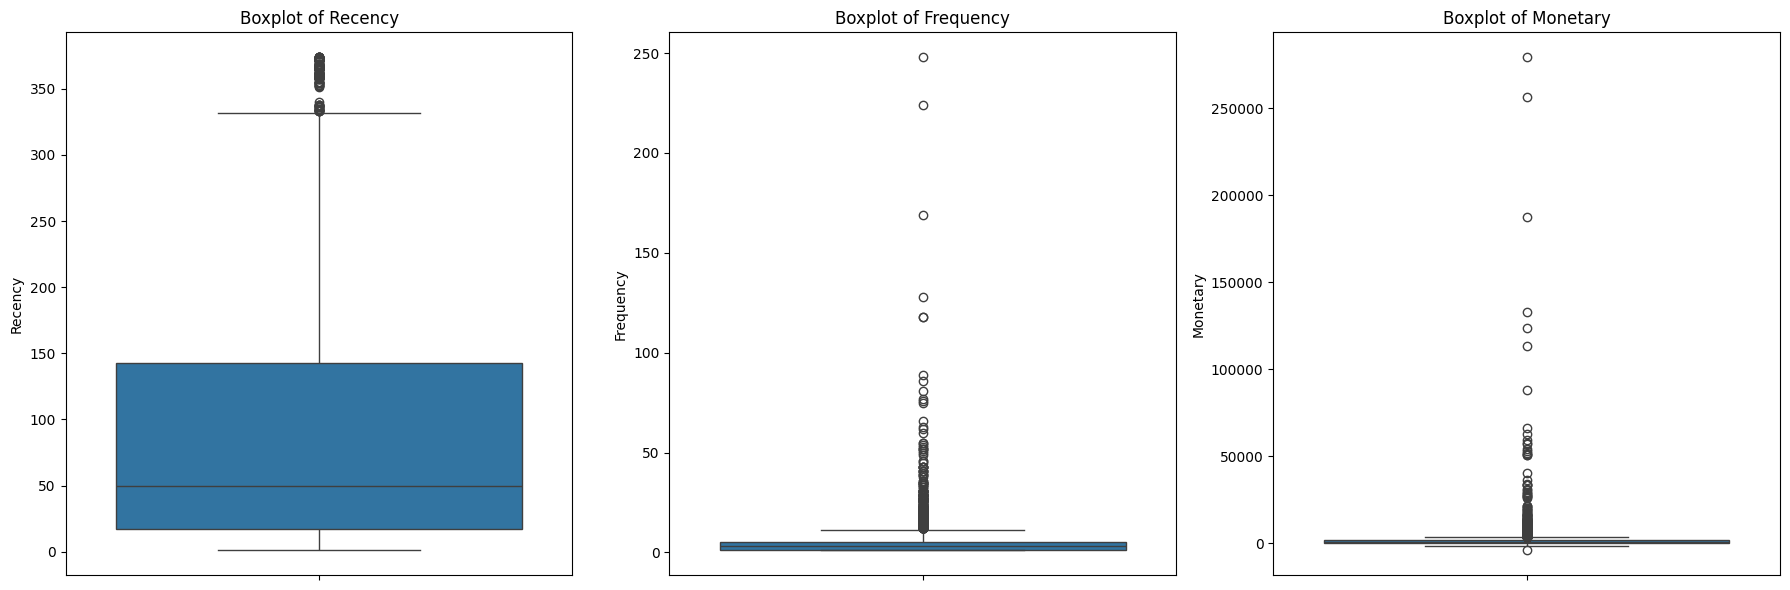

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure dengan 1 baris dan 3 kolom
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # 3 kolom sejajar

# List kolom RFM
columns = ['Recency', 'Frequency', 'Monetary']

# Loop untuk membuat boxplot setiap metrik
for i, col in enumerate(columns):
    sns.boxplot(y=rfm_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


Removed 149 outliers from 'Recency' column using IQR method.
Removed 308 outliers from 'Frequency' column using IQR method.
Removed 293 outliers from 'Monetary' column using IQR method.

RFM DataFrame after removing outliers:


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
5,12352.0,36,11,1545.41


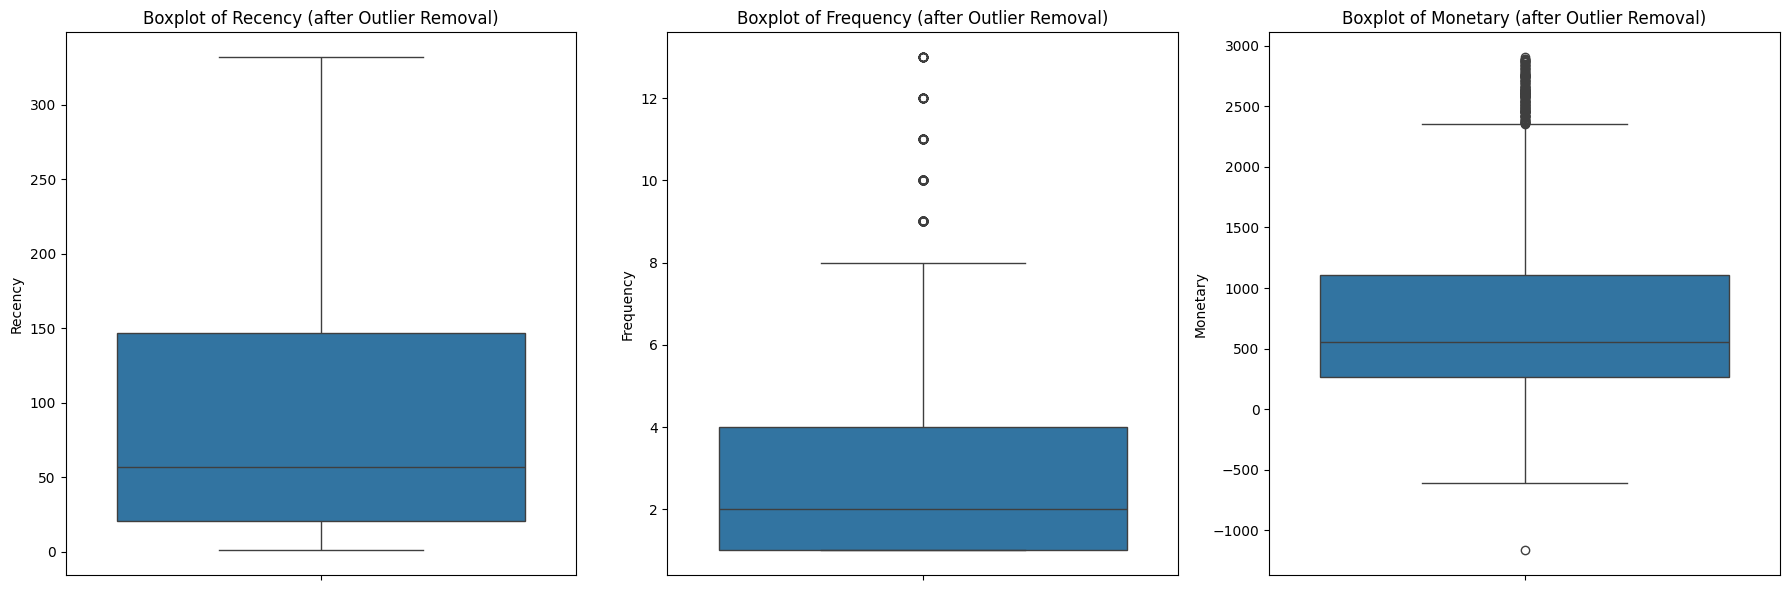

In [12]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    return df_filtered

# Apply the outlier removal function to each RFM column
rfm_df_filtered = rfm_df.copy()
for col in ['Recency', 'Frequency', 'Monetary']:
    initial_rows = len(rfm_df_filtered)
    rfm_df_filtered = remove_outliers_iqr(rfm_df_filtered, col)
    removed_rows = initial_rows - len(rfm_df_filtered)
    print(f"Removed {removed_rows} outliers from '{col}' column using IQR method.")

print("\nRFM DataFrame after removing outliers:")
display(rfm_df_filtered.head())

# Visualize the data after outlier removal (in one row)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
columns = ['Recency', 'Frequency', 'Monetary']

for i, col in enumerate(columns):
    sns.boxplot(y=rfm_df_filtered[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} (after Outlier Removal)')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


## STEP 5 : Clustering (Unsupervised Learning)

In [13]:
from sklearn.preprocessing import StandardScaler

# Ambil hanya fitur RFM
rfm_for_clustering = rfm_df_filtered[['Recency', 'Frequency', 'Monetary']]

# Standardisasi
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_clustering)


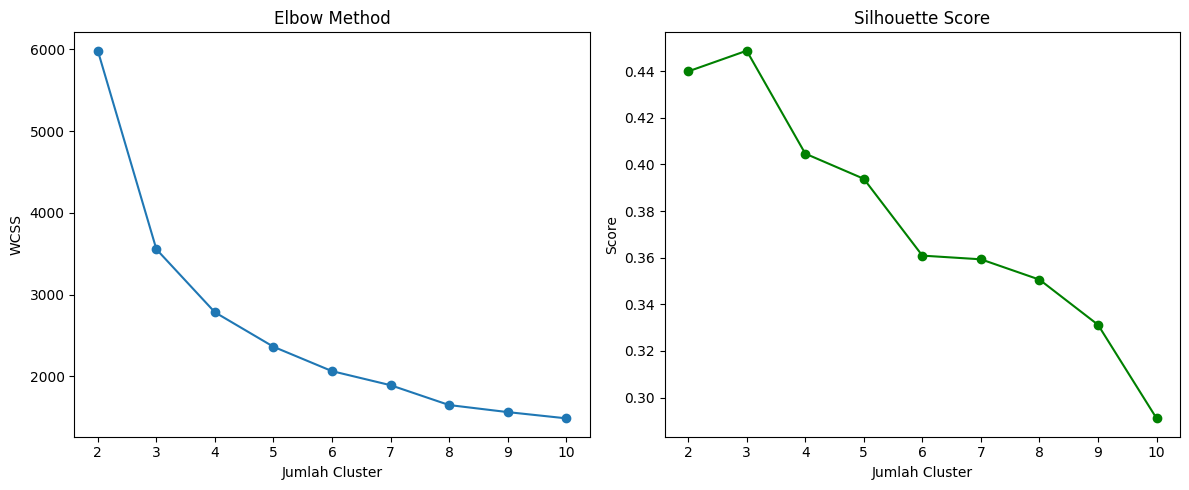

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Coba beberapa jumlah cluster
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)  # Elbow
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [15]:
# Jalankan KMeans dengan 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# Tambahkan cluster ke dataframe
rfm_df_filtered['Cluster'] = kmeans.labels_


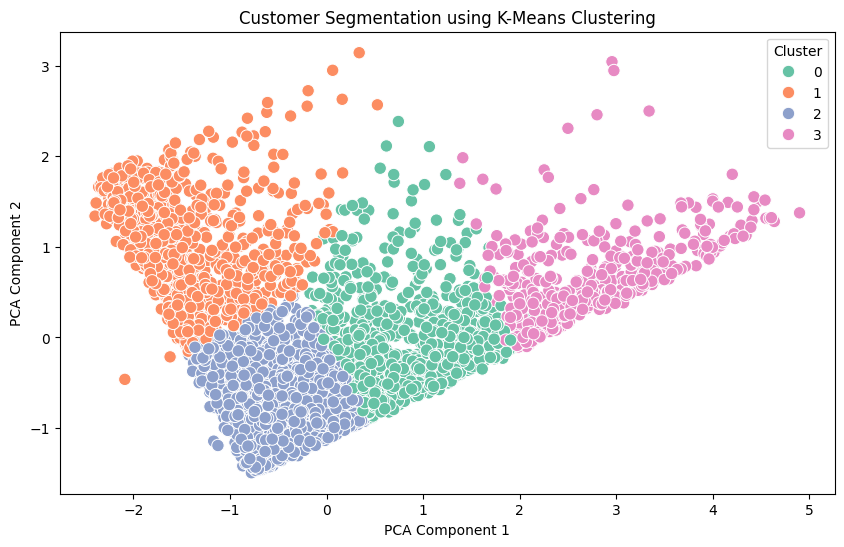

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

rfm_df_filtered['PCA1'] = pca_components[:, 0]
rfm_df_filtered['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df_filtered, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=80)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [17]:
# Hitung nilai rata-rata RFM per cluster
cluster_profile = rfm_df_filtered.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
cluster_profile['Count'] = rfm_df_filtered['Cluster'].value_counts()
cluster_profile = cluster_profile.reset_index().sort_values('Cluster')

# Tampilkan profil
display(cluster_profile)


,Cluster,Recency,Frequency,Monetary,Count
0,0,47.7,4.3,1178.0,890
1,1,233.1,1.7,370.1,876
2,2,51.3,1.8,392.2,1426
3,3,30.2,8.2,2052.1,430


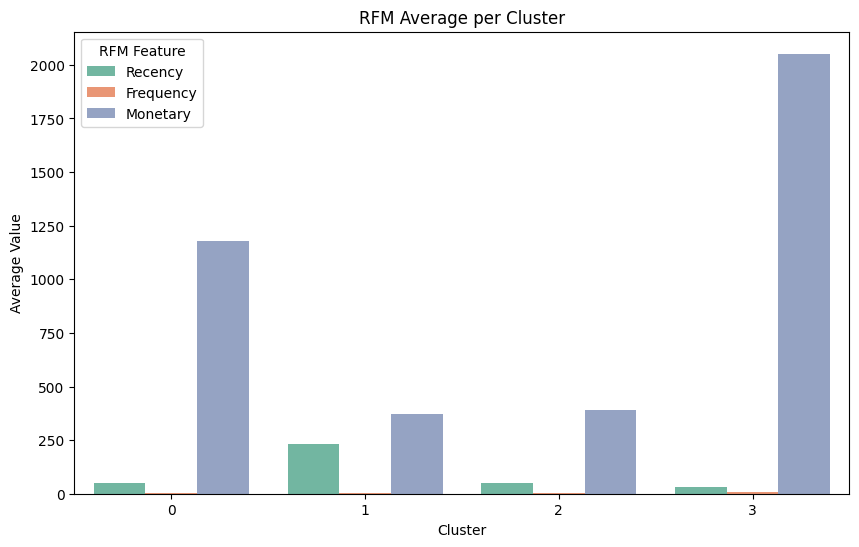

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi barplot rata-rata RFM
cluster_melted = cluster_profile.melt(id_vars='Cluster', value_vars=['Recency', 'Frequency', 'Monetary'])

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_melted, x='Cluster', y='value', hue='variable', palette='Set2')
plt.title('RFM Average per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend(title='RFM Feature')
plt.show()


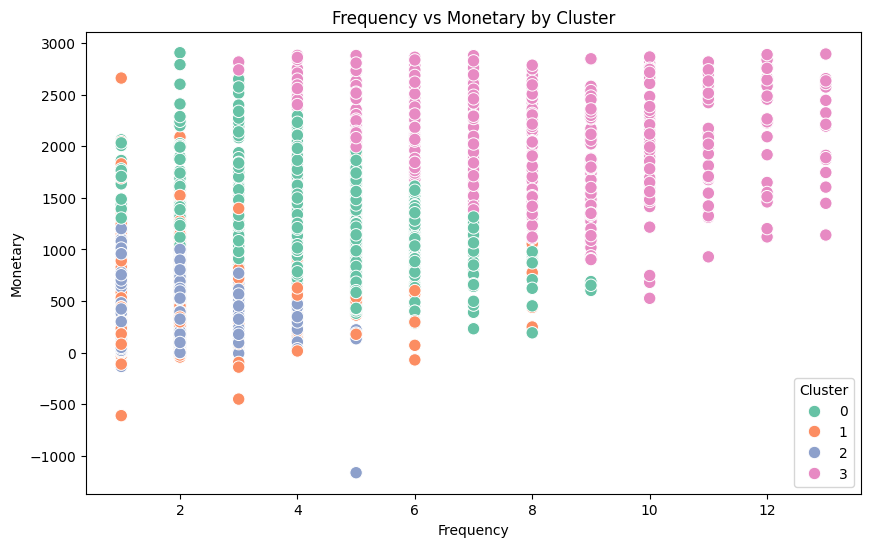

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df_filtered, x='Frequency', y='Monetary', hue='Cluster', palette='Set2', s=80)
plt.title('Frequency vs Monetary by Cluster')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.show()
